In [1]:
%matplotlib inline


# Analysis Noise to Speech at Specific SNR Levels


In [2]:
# to be able to import soundpy from parent directory:
import os
package_dir = '../'
os.chdir(package_dir)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd '/content/drive/MyDrive/Velozity/SpeechEnhancement'

/content/drive/MyDrive/Velozity/SpeechEnhancement


In [ ]:
!pip install soundpy

Let's import soundpy, assuming it is in your working directory:



In [4]:
import soundpy as sp;
import IPython.display as ipd

### Speech sample:



In [10]:
# use `soundpy.utils.string2pathlib` to convert string to pathlib object
speech_sample = sp.string2pathlib('audiodata/python.wav')
# with pathlib object, can do the following: 
word = speech_sample.stem
word

'python'

### Noise sample:



In [11]:
# use `soundpy.utils.string2pathlib` to convert string to pathlib object
noise_sample = 'audiodata/background_samples/cafe.wav'
noise_sample = sp.string2pathlib(noise_sample)
# with pathlib object, can do the following: 
noise = noise_sample.stem
noise

'cafe'

## At SNR Level 20

In [12]:
sr = 48000
noisyspeech_20snr, snr20 = sp.dsp.add_backgroundsound(speech_sample,
                                           noise_sample,
                                           sr = sr,
                                           snr = 20)
ipd.Audio(noisyspeech_20snr,rate=sr)

/usr/local/lib/python3.8/dist-packages/soundpy/dsp.py:730: UserWarning: 



  warnings.warn('\n\nWarning: Only zeros found in signal.\n\n')
/usr/local/lib/python3.8/dist-packages/soundpy/dsp.py:887: UserWarning: 



  warnings.warn('\n\nWarning: was not able to clip at zero where '+\


## At SNR Level 5

In [13]:
noisyspeech_5snr, snr5 = sp.dsp.add_backgroundsound(speech_sample,
                                           noise_sample,
                                           sr = sr,
                                           snr = 5)
ipd.Audio(noisyspeech_5snr,rate=sr)

# Visualize the Audio Samples


In [15]:
import matplotlib
matplotlib.use('TKAgg')
import matplotlib.pyplot as plt

## Speech audio sample in its raw signal



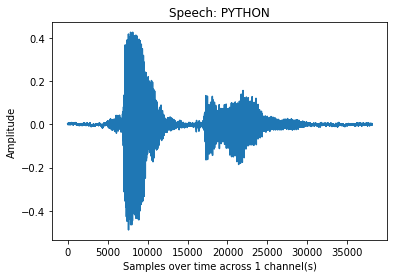

In [16]:
sp.plotsound(speech_sample, feature_type='signal', 
               title = 'Speech: ' + word.upper())

## Noise audio sample in its raw signal



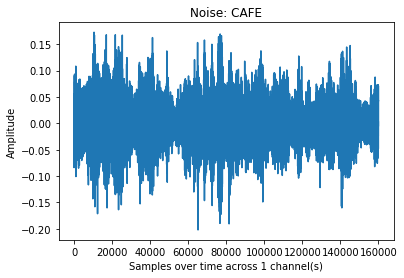

In [17]:
sp.plotsound(noise_sample, feature_type='signal',
               title = 'Noise: ' + noise.upper())

## The sounds added together at SNR level 20



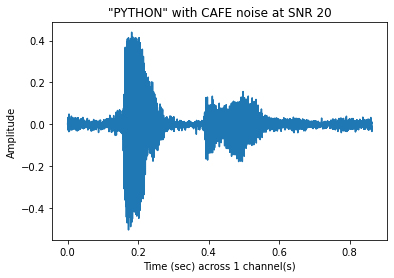

In [18]:
sp.plotsound(noisyspeech_20snr, sr = sr, feature_type = 'signal',
               title = '"{}" with {} noise at SNR 20'.format(word.upper(), noise.upper()))

## The sounds added together at SNR level 5



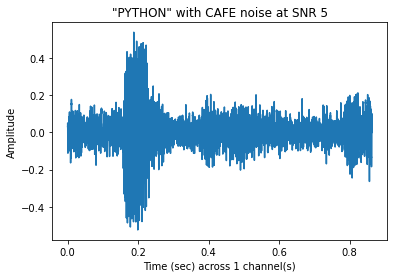

In [19]:
sp.plotsound(noisyspeech_5snr, sr = sr, feature_type = 'signal',
               title = '"{}" with {} noise at SNR 5'.format(word.upper(), noise.upper()))

## Let's visualize the power spectrum: pure speech



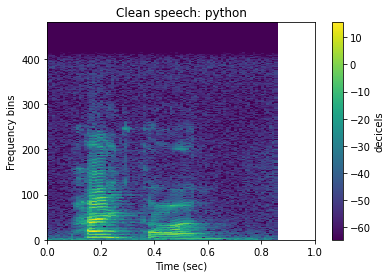

In [20]:
sp.plotsound(speech_sample, sr = sr, feature_type = 'powspec',
               title = 'Clean speech: {}'.format(word),
               energy_scale = 'power_to_db')

## Let's visualize the power spectrum: SNR 20



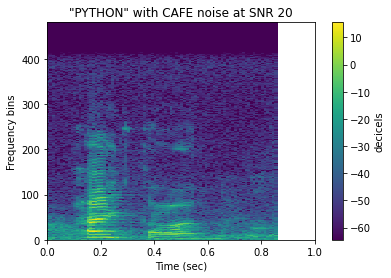

In [21]:
sp.plotsound(noisyspeech_20snr, sr = sr, feature_type = 'powspec',
               title = '"{}" with {} noise at SNR 20'.format(word.upper(), noise.upper()),
               energy_scale = 'power_to_db')

## Let's visualize the power spectrum: SNR 5



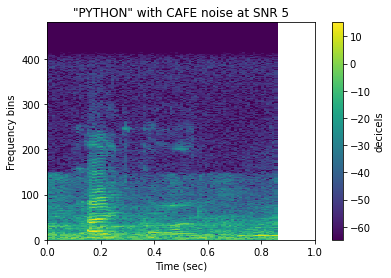

In [22]:
sp.plotsound(noisyspeech_5snr,sr = sr, feature_type = 'powspec',
               title = '"{}" with {} noise at SNR 5'.format(word.upper(), noise.upper()),
               energy_scale = 'power_to_db')

## Speech and the total signal



In [23]:
noisyspeech_20snr, snr20 = sp.dsp.add_backgroundsound(speech_sample,
                                           noise_sample,
                                           sr = sr,
                                           snr = 20,
                                           pad_mainsound_sec = 1,
                                           total_len_sec = 4)

/usr/local/lib/python3.8/dist-packages/soundpy/dsp.py:730: UserWarning: 



  warnings.warn('\n\nWarning: Only zeros found in signal.\n\n')
/usr/local/lib/python3.8/dist-packages/soundpy/dsp.py:887: UserWarning: 



  warnings.warn('\n\nWarning: was not able to clip at zero where '+\


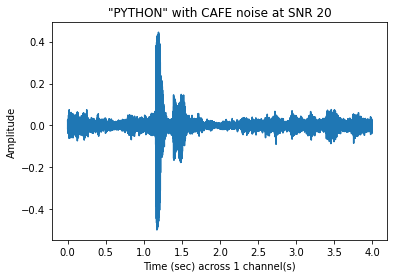

In [24]:
sp.plotsound(noisyspeech_20snr, sr = sr, feature_type = 'signal',
               title = '"{}" with {} noise at SNR 20'.format(word.upper(), noise.upper()))
ipd.Audio(noisyspeech_20snr,rate=sr)

## Shorten the total signal



In [25]:
noisyspeech_20snr, snr20 = sp.dsp.add_backgroundsound(speech_sample,
                                           noise_sample,
                                           sr = sr,
                                           snr = 20,
                                           total_len_sec = 0.5)

/usr/local/lib/python3.8/dist-packages/soundpy/dsp.py:531: UserWarning: The length of `audio_main` and `pad_mainsound_sec `exceeds `total_len_sec`. 17462 samples from `audio_main` will be cut off in the `combined` audio signal.
  warnings.warn('The length of `audio_main` and `pad_mainsound_sec `'+\
/usr/local/lib/python3.8/dist-packages/soundpy/dsp.py:730: UserWarning: 



  warnings.warn('\n\nWarning: Only zeros found in signal.\n\n')
/usr/local/lib/python3.8/dist-packages/soundpy/dsp.py:887: UserWarning: 



  warnings.warn('\n\nWarning: was not able to clip at zero where '+\


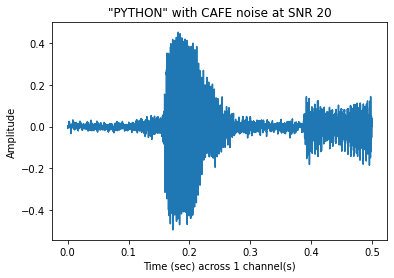

In [26]:
sp.plotsound(noisyspeech_20snr, sr = sr, feature_type = 'signal',
               title = '"{}" with {} noise at SNR 20'.format(word.upper(), noise.upper()))
ipd.Audio(noisyspeech_20snr,rate=sr)